# Model Prediksi Churn Nasabah Bank Menggunakan Machine Learning: Studi Kasus pada Data Bank Syariah <a id='intro'></a>

Sebuah `Bank Syariah` yang menerapkan akad syariah `agama islam` dalam proses bisnisnya dimana hanya menyediakan layanan jual beli, bukan akad peminjaman uang dengan riba terhadap pihak pertama (`developer/penjual`), kedua(`bank`) dan ketiga(`nasabah`). Nasabah yang menginginkan sesuatu namun terkendala biaya bisa menggunakan fasilitas ini, dimana barang dibeli oleh bank kemudian dijual kembali dengan margin yang lebih tinggi kepada nasabah dengan pembayaran cicil selama jangka waktu tertentu. Dataset ini bukan merupakan dataset asli dari `Bank Syariah`, hanya dijadikan sebagai tujuan pembelajaran.

Nasabah `Bank Syariah` pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.
Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Kita memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank. Target dinyatakan dengan `Kelas 0` bahwa nasabah tidak segera pergi dan `Kelas 1` bahwa nasabah akan segera pergi.

Berdasarkan penjelasan diatas, `model machine learning` yang dipilih adalah jenis `klasifikasi - supervised learning`. Kita akan mencari F1 Skor semaksimal mungkin dan melihat metrik AUC-ROC. Ambang batas (threshold) F1 yang ditetapkan untuk projek ini sebesar 0.59.

Beberapa tujuan dan rumusan masalah dari analisis projek ini:
- Mengetahui algoritma terbaik untuk `model machine learning` untuk dataset `Bank Syariah`
- `Hyperparameter` terbaik seperti apa pada `model machine learning`
- Apakah ketidak seimbangan (`imbalance`) kelas mempengaruhi metrik kualitas `model machine learning`?
- Benarkah model yang sudah dilatih menggunakan kelas data yang seimbang (`balance`) menghasilkan metrik kualitas F1 yang lebih baik?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Konten](#back)
* [Tahap 1. Mempersiapkan Dataset](#cont_1)
    * [1.1 Memuat Library](#cont_2) 
    * [1.2 Memuat Dataset](#cont_3)
    * [1.3 Menseleksi Fitur](#cont_4) 
    * [1.4 Mengecek Duplikasi](#cont_5) 
    * [1.5 Mengecek Nilai Yang Hilang](#cont_6) 
* [Tahap 2. Preparasi Model Machine Learning](#cont_7)
    * [2.1 Membuat One Hot Encoding (OHE)](#cont_8) 
    * [2.2 Memisahkan Fitur dan Target dari Dataset](#cont_9) 
    * [2.3 Menskalakan Fitur](#cont_10) 
    * [2.4 Keseimbangan Kelas](#cont_11) 
    * [2.5 Membagi Dataset](#cont_12) 
* [Tahap 3. Aplikasi Model Machine Learning](#cont_13)
    * [3.1 Algoritma Klasifikasi Decision Tree](#cont_14) 
    * [3.2 Algoritma Klasifikasi Random Forest](#cont_15) 
    * [3.3 Algoritma Regresi Logistik](#cont_16) 
* [Tahap 4. Kesimpulan Umum](#cont_17)
    * [4.1 Mengatasi Kelas yang Tidak Seimbang (Imbalance)](#cont_18) 
    * [4.2 Metrik Kualitas Model Terbaik (Optimized Model)](#cont_19) 
* [Tahap 5. Kesimpulan Umum](#cont_20)

# Mempersiapkan Dataset <a id='cont_1'></a>

Tahap pertama yang perlu dilakukan adalah mempersiapkan dataset mulai dari `memuat library` yang diperlukan, `memuat dataset kedalam projek`, `mengecek sampel data`, `mengecek nilai yang hilang`, `mengecek duplikat`, `mengecek tipe data` dan `mengecek keseimbangan kelas`.

## Memuat Library <a id='cont_2'></a>

Selanjutnya kita akan memuat library yang diperlukan. Disini kita membutuhkan beberapa library yaitu `pandas` untuk mengolah dataset, `seaborn` untuk visualisasi data dan `scikit learn` untuk pemodelan `machine learning`. Mari kita muat library yang dibutuhkan.

In [24]:
# memuat library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# set tema seaborn
sns.set_theme(palette='bright')

## Memuat Dataset <a id='cont_3'></a>

Mari kita muat dataset `Bank Syariah` kedalam projek menggunakan library `pandas`. Dataset ini bukan merupakan dataset asli dari bank syariah dan ini hanya sebuah latihan `model machine learning`.

In [25]:
# memuat dataset
df_churn = pd.read_csv('Churn.csv')

Selanjutnya kita akan menampilkan informasi dan sampel data dari dataset `Bank Syariah`.

In [26]:
# mengecek informasi dataset
print(df_churn.info())

# menampilkan sampel data
df_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Dataset berisi berbagai variabel/kolom yang dirincikan sebagai berikut:
<br><br>
Fitur-fitur:
- `RowNumber` — merupakan indeks dari record dataset
- `CustomerId` — merupakan ID nasabah
- `Surname` — merupakan nama belakang
- `CreditScore` — merupakan skor kredit
- `Geography` — merupakan negara domisili
- `Gender` — merupakan jenis kelamin
- `Age` — merupakan usia nasabah
- `Tenure` — merupakan tenor dalam tahun
- `Balance` — merupakan saldo rekening nasabah
- `NumOfProducts` — merupakan jumlah produk yang digunakan nasabah
- `HasCrCard` — apakah nasabah mempunyai kartu, jika ya maka 1, tidak maka 0
- `IsActiveMember` — apakah nasabah merupakan member aktif, jika ya maka 1, tidak maka 0
- `EstimatedSalary` — merupakan jumlah gaji

Target:
- `Exited` — apakah nasabah telah berhenti, jika ya maka 1, tidak maka 0

Berdasarkan informasi diatas menunjukan bahwa dataset terdiri dari `10000 baris` dan `14 kolom` serta memiliki `nilai yang hilang` pada kolom `Tenure`.

## Menseleksi Fitur <a id='cont_4'></a>

Berdasarkan informasi diatas terdapat beberapa Fitur/kolom yang tidak mendukung dalam pelatihan `Model Machine Learning` diantaranya kolom `RowNumber`, `CustomerId`, `Surname`. Mari kita singkirkan variabel tersebut

In [27]:
# membuang kolom `RowNumber`, `CustomerId`, `Surname`
df_churn.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

# menampilkan sampel dataset
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Kolom `RowNumber`, `CustomerId`, `Surname` sudah kita singkirkan.

## Mengecek Duplikasi <a id='cont_5'></a>

Selanjutnya kita akan mengecek duplikasi pada dataset. Jika terdapat banyak duplikat baris yang sama, maka akan mengurangi keakuratan `model machine learning` yang akan kita buat.

In [28]:
# mengecek duplikasi pada dataset
df_churn.duplicated().sum()

0

Bisa dilihat kita tidak memiliki duplikat data yang sama pada dataset ini.

## Mengecek Nilai Yang Hilang <a id='cont_6'></a>

Mari kita pastikan kembali untuk nilai yang hilang pada datasets yang kita miliki.

In [29]:
# mengecek nilai yang hilang pada dataset
df_churn.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Terdapat `909` nilai yang hilang pada kolom `Tenure`. Mari kita perbaiki nilai yang hilang tersebut dengan menggunakan nilai `mean` atau `median`. Mari kita cari tahu distribusi data pada kolom tersebut dengan menggunakan `boxplot`.

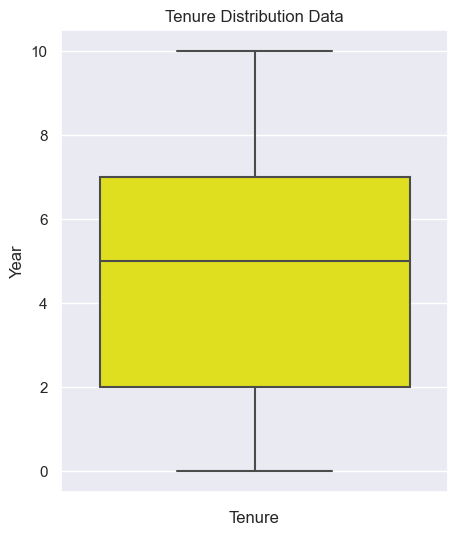

In [30]:
# mengecek distribusi kolom 'Tenure' dengan boxplot
plt.figure(figsize=(5,6))
sns.boxplot(data=df_churn, y='Tenure', color='yellow')

# menambahkan atribut pada grafik
plt.title('Tenure Distribution Data')
plt.ylabel('Year')
plt.xlabel('Tenure')

# menampilkan grafik
plt.show()

Bisa dilihiat bahwa data pada kolom ini tidak memilki `outliers`, sehingga bisa kita isi dengan menggunakan nilai `mean`.

In [31]:
# rata-rata tenure
mean_tenure = round(df_churn['Tenure'].mean())
mean_tenure

5

In [32]:
# mengisi nilai yang hilang pada kolom 'Tenure'
df_churn['Tenure'].fillna(mean_tenure, inplace=True)

# mengecek nilai yang hilang pada kolom 'Tenure'
df_churn['Tenure'].isna().sum()

0

Sekarang kita tidak mempunyai dataset yang memiliki nilai yang hilang dan data siap diproses.

# Preparasi Model Machine Learning <a id='cont_7'></a>

Membuat `model machine learning` yang terbaik diperlukan beberapa tahapan diantaranya: pembagian dataset, memilih algoritma, menguji algoritma, `tuning hyperparamater`. Mempersiapkan dataset untuk melatih `model machine learning` berbeda dengan mempersiapkan data untuk analisis statistik biasa.

## Membuat One Hot Encoding (OHE) <a id='cont_8'></a>

Pada dataset terdapat fitur/kolom yang berisi kelas kategorik seperti pada kolom `Geography` dan `Gender`. Kita cek apakah kolom tersebut cocok untuk diterapkan One Hot Encoding (OHE).

In [33]:
# mengecek data kategori
# menampilkan kolom geografi
print('Geography -->',df_churn['Geography'].unique())

# menampilkan kolom jenis kelamin
print('Gender -->',df_churn['Gender'].unique())

Geography --> ['France' 'Spain' 'Germany']
Gender --> ['Female' 'Male']


Karena kolom `Geography` dan `Gender` hanya memuat kelas yang sedikit maka kita bisa terapkan `One Hot Encoder (OHE)`.

In [34]:
# membuat dummies pada kolom kategorik
df_churn = pd.get_dummies(df_churn, drop_first=True)

# menampilkan sampel dataset terbaru
df_churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


`One Hot Encoder (OHE)` sudah bisa kita terapkan.

## Memisahkan Fitur dan Target dari Dataset <a id='cont_9'></a>

Disini kita akan menentukan kolom `Exited` sebagai `target` dan sisanya sebagai `Fitur`.

In [35]:
# memisahkan fitur dan target dari dataset
features = df_churn.drop('Exited',axis=1)
target = df_churn['Exited']

print('Features -->', features.shape)
print('Target -->', target.shape)

Features --> (10000, 11)
Target --> (10000,)


Sekarang kita memiliki `11 Fitur` dan `1 Target`.

## Menskalakan Fitur <a id='cont_10'></a>

Disini kita akan melakukan `scaling` pada fitur numerik untuk memudahkan pelatihan pada `model machine learning`. Mari kita cek fitur numerik mana yang akan kita `scaling`. Beberapa fitur numerik yang besar seperti pada 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', namun untuk 'Tenure' dan 'NumOfProducts' kita akan meninjaunya.

In [36]:
# nilai unik pada kolom 'Tenure' dan 'NumOfProducts'
print('Tenure -->',features['Tenure'].unique())
print('NumOfProducts -->',features['NumOfProducts'].unique())

Tenure --> [ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0.]
NumOfProducts --> [1 3 2 4]


Bisa kita lihat kelas-kelas yang ada pada kedua fitur tersebut tidak memiliki rentang yang cukup jauh, sehingga kita tidak akan melakukan `scaling` pada kolom ini.

Selanjutnya kita lakukan `scaling` untuk fitur 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'.

In [37]:
# menskalakan fitur menggunakan 'StandardScaler'
numeric = ['CreditScore','Age','Balance','EstimatedSalary']
features[numeric] = StandardScaler().fit_transform(features[numeric])

# menampilkan sampel fitur
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2.0,-1.225848,1,1,1,0.021886,False,False,False
1,-0.440036,0.198164,1.0,0.117350,1,0,1,0.216534,False,True,False
2,-1.536794,0.293517,8.0,1.333053,3,1,0,0.240687,False,False,False
3,0.501521,0.007457,1.0,-1.225848,2,0,0,-0.108918,False,False,False
4,2.063884,0.388871,2.0,0.785728,1,1,1,-0.365276,False,True,False


Fitur-fitur tersebut sudah selesai kita `scaling`.

## Keseimbangan Kelas <a id='cont_11'></a>

Untuk mengetahui apakah dataset kita seimbang atau tidak seimbang (imbalance), kita bisa mengetahuinya pada kolom `target`. Mari kita cari tahu.

In [38]:
# cek keseimbangan dataset menggunakan kolom target
target.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Bisa terlihat bahwa dataset yang kita punya ternyata tidak seimbang (imbalance) dimana proporsi `kelas 0` jauh lebih banyak dari `kelas 1`. 

## Membagi Dataset <a id='cont_12'></a>

Karena kita hanya memilki satu buah dataset, kita akan membaginya kedalam dua kelompok untuk membuat `model machine learning`. Pembagian dipecah menjadi `80%` dataset untuk `training` dan `20%` dataset untuk `validasi`.

In [39]:
# membagi dataset menjadi dua macam dengan porsi training(80%) dan validasi(20%)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=12345)

# menampilkan shape dari variabel diatas
print('feature train -->', features_train.shape)
print('feature valid -->', features_valid.shape)
print('target train -->', target_train.shape)
print('target valid -->', target_valid.shape)

feature train --> (8000, 11)
feature valid --> (2000, 11)
target train --> (8000,)
target valid --> (2000,)


Dataset sudah berhasil kita `split` sesuai dengan persentasenya.

# Aplikasi Model Machine Learning <a id='cont_13'></a>

Selanjutnya kita akan membuat `model` serta `mengujinya` menggunakan algoritma yang cocok untuk jenis analisis klasifikasi diantaranya:
- Algoritma Klasifikasi Decision Tree
- Algoritma Klasifikasi Random Forest
- Algoritma Regresi Logistik

Metriks yang digunakan untuk menguji kualitas model yang akan kita terapkan diantaranya:
- F1 Score
- AUC-ROC

### Algoritma Klasifikasi Decision Tree <a id='cont_14'></a>

Disini kita akan mecari tahu kedalaman (`depth`) optimal untuk Algoritma Klasifikasi Decision Tree. Kita set kedalaman dari 1 hingga 50.

In [40]:
# pecobaan algoritma decision tree

# membuat temporary variabel
f1_best = 0
AUC_ROC_best = 0
depth_best = 0

# pengujian kedalaman model decision tree (depth -> 1 ~ 50)
for depth in range(1, 51):
	# membuat model decision tree
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
	# melatih model menggunakan features dan target train
	model.fit(features_train, target_train)
	# prediksi model
	predict = model.predict(features_valid)
	predict_proba = model.predict_proba(features_valid)
	predict_one_valid = predict_proba[:,1]
	# menghitung F1 dan AUC_ROC menggunakan features dan target validation
	f1 = f1_score(target_valid,predict)
	AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

	if f1 > f1_best and AUC_ROC > AUC_ROC_best:
		f1_best = f1
		AUC_ROC_best = AUC_ROC
		depth_best = depth

# menampilkan output        
print("Model Terbaik (Decision Tree)")
print('Depth -->', depth_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Model Terbaik (Decision Tree)
Depth --> 5
F1 Score --> 0.5632183908045977
AUC_ROC --> 0.8451183689633763


Dari sini bisa kita kita lihat kedalaman optimal berada pada `depth=5` dimana kualitas model menghasilkan `F1 Score = 0.56` dan `AUC_ROC=0.84`.

### Algoritma Klasifikasi Random Forest <a id='cont_15'></a>

Dengan cara yang sama kita set kedalaman pohon (`depth`) dari 1 hingga 20, sedangkan jumlah pohon (`n_estimators`) kita set dari 1 hingga 60.

In [41]:
# pecobaan algoritma random forest
# kedalaman pohon: depth -> 1 ~ 20
# jumlah pohon: n_estimators -> 1 ~ 60 {increment 10}

# membuat temporary
f1_best = 0
AUC_ROC_best = 0
depth_best = 0
estimators_best = 0

# pengujian kedalaman model dan jumlah pohon
# pengaturan jumlah pohon
for est in range(1, 61, 10):
    # pengaturan jumlah kedalaman pohon
    for depth in range (1, 21):
        # membuat model random forest classifier
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # melatih model menggunakan features dan target train
        model.fit(features_train, target_train)
        predict = model.predict(features_valid)
        predict_proba = model.predict_proba(features_valid)
        predict_one_valid = predict_proba[:,1]
        # menghitung F1 dan AUC_ROC menggunakan features dan target validation
        f1 = f1_score(target_valid,predict)
        AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

        if f1 > f1_best and AUC_ROC > AUC_ROC_best:
            f1_best = f1
            AUC_ROC_best = AUC_ROC
            depth_best = depth
            estimators_best = est

# menampilkan output        
print("Model Terbaik (Random Forest)")
print('Depth -->', depth_best)
print('Trees -->', estimators_best)
print('F1 Score -->', f1_best)
print('AUC_ROC -->', AUC_ROC_best)

Model Terbaik (Random Forest)
Depth --> 10
Trees --> 21
F1 Score --> 0.5523520485584218
AUC_ROC --> 0.863364653230525


Dari sini bisa kita kita lihat kedalaman optimal berada pada `depth=10` dan jumlah pohon optimal berada pada `n_estimators=21` dimana kualitas model menghasilkan `F1 Score = 0.55` dan `AUC_ROC=0.86`.

### Algoritma Regresi Logistik <a id='cont_16'></a>

Dengan cara yang sama kita akan menguji `algoritma regresi logistik` menggunakan `solver` 'liblinear'.

In [42]:
# pecobaan algoritma regresi logistik

# membuat model regresi logistik
model = LogisticRegression(random_state=12345, solver='liblinear') 

# melatih model menggunakan features dan target train
model.fit(features_train, target_train)

# menghitung akurasi menggunakan features dan target validation
predict = model.predict(features_valid)
predict_proba = model.predict_proba(features_valid)
predict_one_valid = predict_proba[:,1]

# menghitung F1 Skor dan AUC_ROC
f1 = f1_score(target_valid,predict)
AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

# menampilkan output        
print("Model Regresi Logistik")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)

Model Regresi Logistik
F1 Score --> 0.2857142857142857
AUC_ROC --> 0.7575881644436042


Dari sini bisa kita kita lihat kualitas model menghasilkan `F1 Score = 0.28` dan `AUC_ROC=0.76`.

Dari ketiga model tersebut, yang akan kita pilih sebagai algoritma terbaik adalah `algoritma random forest` dengan `hyperparamater` terbaik pada `depth=10` dan `n_estimators=21`.

# Optimaliasi Model Machine Learning <a id='cont_17'></a>

Berdasarkan informasi sebelumnya bahwa dataset yang kita punya memiliki kelas yang tidak seimbang (`imbalance`), sehingga model dilatih yang kurang optimal. Mari kita optimalkan dataset agar menjadi seimbang (`balance`) dan `F1 Skor` melampaui `threshold` yang ditetapkan `0.59`.

## Mengatasi Kelas yang Tidak Seimbang (Imbalance) <a id='cont_18'></a>

Metode yang akan kita gunakan untuk menyeimbangkan dataset yaitu `teknik upsampling`, `downsampling` pada dataset dan juga mengaktifkan `class_weight = 'balanced'` pada model.

`Kelas 0` memiliki jumlah yang jauh lebih banyak dibandingkan dengan `Kelas 1`, sehingga kita akan menggandakan `Kelas 1` dan mereduksi `Kelas 0`. Mari kita buat fungsinya.

In [43]:
# melakukan upsampling dan downsampling pada dataset

def up_down(feature,target,repeat,fraction):
    features_zero = feature[target == 0]
    feature_one = feature[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]

    # downsampling dataset
    down_1 = features_zero.sample(frac=fraction,random_state=12345)
    down_2 = target_zero.sample(frac=fraction,random_state=12345)

    # upsampling dataset
    temp_1 = pd.concat([down_1] + [feature_one]*repeat)
    temp_2 = pd.concat([down_2] + [target_one]*repeat)

    # mengacak data
    features_new, target_new = shuffle(temp_1, temp_2, random_state=12345)

    return features_new, target_new

Selanjutnya mari kita buat fitur dan target yang baru. Agar seimbang mari kita gandakan `Kelas 1` sebanyak `2x` dan kita `reduksi 50%` pada `Kelas 0`.

In [44]:
# menerapkan ke dalam fungsi yang sudah dibuat repeat=2, fraksi=50%
features_updown, target_updown = up_down(features_train, target_train, 2, 0.5)

# cek kembali keseimbangan dataset pada target
target_updown.value_counts(normalize=True)

Exited
1    0.501949
0    0.498051
Name: proportion, dtype: float64

Sudah terlihat bahwa `Kelas 1` dan `Kelas 0` yang baru hampir mendekati seimbang (`balance`).

## Metrik Kualitas Model Terbaik (Optimized Model) <a id='cont_19'></a>

Selanjutnya kita buat model yang optimal serta mengujinya menggunakan dataset yang seimbang (`balance`). Kita menggunakan `Algoritma Random Forest` untuk `depth=10` dan `n_estimators=21` serta mengaktifkan `class_weight = 'balanced'`.

In [45]:
# membuat model random forest dengan balancing weight 
# n_estimators = 21
# depth = 10

model = RandomForestClassifier(
    random_state = 12345, 
    n_estimators = 21, 
    max_depth = 10,
    class_weight = 'balanced'
    )

# melatih model menggunakan dataset yang baru
model.fit(features_updown, target_updown)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=21,
                       random_state=12345)

Mari kita latih model terbaik serta uji kualitasnya.

In [46]:
# membuat prediksi berdasarkan model
predict = model.predict(features_valid)
predict_proba = model.predict_proba(features_valid)
predict_one_valid = predict_proba[:,1]

# membuat f1 skor dan AUC_ROC
f1 = f1_score(target_valid,predict)
AUC_ROC = roc_auc_score(target_valid,predict_one_valid)

print("Optimizes Model (Random Forest)")
print('F1 Score -->', f1)
print('AUC_ROC -->', AUC_ROC)

Optimizes Model (Random Forest)
F1 Score --> 0.6252465483234714
AUC_ROC --> 0.857552283781792


Sekarang model kita memiliki `F1 Skor` sebesar `0.62` yang melampaui `threshold` yang ditetapkan sebesar `0.59`.

# Kesimpulan Umum <a id='cont_20'></a>

Dari projek ini kita sudah memuat library yang diperlukan, mempersiapkan dataset, membagi dataset, melatih serta menguji `model machine learning` serta melakukan optimasi pada model dengan mengatasi adanya `imbalance` pada dataset. Dapat disimpulkan sebagai berikut:
- Pembagian dataset untuk melatih serta menguji `model machine learning` dibagi menjadi `80%` untuk `training` dan `20%` untuk `validasi`.
- Algoritma yang diujikan diantaranya: `Klasifikasi Decision Tree`, `Klasifikasi Random Forest` dan `Regresi Logistik`.
- Algoritma terbaik dengan `hyperparameter`nya adalah `Algoritma Klasifikasi Random Forest` dengan `hyperparameter` untuk `depth=10` dan `n_estimators=21` dengan kualitas `F1 Skor` sebersar `0.55` dan `AUC_ROC` sebesar `0.86`.
- Metode untuk mengatasi ketidak seimbangan kelas (imbalance) yaitu `teknik upsampling`, `downsampling` pada dataset dan juga mengaktifkan `class_weight = 'balanced'` pada model.
- Kualitas model yang dihasilkan setelah optimasi menghasilkan `F1 Skor` sebesar `0.62` yang melebihi `threshold` yang titetapkan sebesar `0.59`.